In [ ]:
#load dataset

import pandas as pd
df = pd.read_csv('/content/new_fused_dataset.csv')
df.head()

,suicides/100k pop,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 5-9 years,Income composition of resources,Schooling,HDI for year,gdp_per_capita ($)
0,8.27,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
1,5.38,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
2,5.01,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
3,3.94,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695
4,3.58,developing,76.2,91,1,5.28,41.822757,99,10,54.3,...,99,5.34,99,0.1,494.358832,1.5,0.725,12.5,-1.18134,-0.679695


## **Prepare Data for Clustering**

Remove the 'Suicide Rate' variable from the dataset to prevent leakage. Then, apply Z-score standardization to all remaining features to ensure proper scaling for clustering.


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Drop the 'suicides/100k pop' column
df_clustering = df.drop(columns=['suicides/100k pop'])

# 2. Identify numerical columns for standardization
numeric_cols = df_clustering.select_dtypes(include=['number']).columns

# dia exclude 'Staus' features sbb 'Status' je bukan numeric
# In this dataset, 'Status' is already not a number, so no explicit exclusion is needed for it.
# so nanti dia akan cluster dgn similar value yg datang drpd 'Developed' or 'Developing'

# Subset the DataFrame to only include numerical columns for scaling
df_numeric = df_clustering[numeric_cols]

# 3. Initialize StandardScaler
scaler = StandardScaler()

# 4. Apply Z-score standardization
scaled_data = scaler.fit_transform(df_numeric)

# 5. Convert the scaled data back to a DataFrame, retaining column names
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

print("Shape of original DataFrame:", df.shape)
print("Shape after dropping 'suicides/100k pop':", df_clustering.shape)
print("Shape of scaled numerical DataFrame:", df_scaled.shape)
print("First 5 rows of scaled data:")
print(df_scaled.head())

Shape of original DataFrame: (15264, 21)
Shape after dropping 'suicides/100k pop': (15264, 20)
Shape of scaled numerical DataFrame: (15264, 19)
First 5 rows of scaled data:
   Life expectancy  Adult Mortality  infant deaths   Alcohol  \
0         0.111501        -0.317116      -0.315335 -0.469481   
1         0.111501        -0.317116      -0.315335 -0.469481   
2         0.111501        -0.317116      -0.315335 -0.469481   
3         0.111501        -0.317116      -0.315335 -0.469481   
4         0.111501        -0.317116      -0.315335 -0.469481   

   percentage expenditure  Hepatitis B   Measles       BMI  under-five deaths  \
0               -0.527596     0.568634 -0.199018  0.396747          -0.323859   
1               -0.527596     0.568634 -0.199018  0.396747          -0.323859   
2               -0.527596     0.568634 -0.199018  0.396747          -0.323859   
3               -0.527596     0.568634 -0.199018  0.396747          -0.323859   
4               -0.527596     0.56863

## **Determine Optimal Number of Clusters**

Apply both the Elbow Method and calculate Silhouette Scores for a range of K values to identify the optimal number of clusters for k-Means. Visualize the results of both methods to support the selection of K.


🔹 Elbow Method (Inertia values)
K = 1 → Inertia = 290016.00
K = 2 → Inertia = 237978.19
K = 3 → Inertia = 213022.20
K = 4 → Inertia = 190292.78
K = 5 → Inertia = 176544.13
K = 6 → Inertia = 167387.51
K = 7 → Inertia = 150508.00
K = 8 → Inertia = 143067.11
K = 9 → Inertia = 137088.95
K = 10 → Inertia = 133096.50

🔹 Silhouette Score & Davies–Bouldin Index
K = 2 → Silhouette = 0.1877, Davies–Bouldin = 1.8001
K = 3 → Silhouette = 0.2180, Davies–Bouldin = 1.7229
K = 4 → Silhouette = 0.2353, Davies–Bouldin = 1.4636
K = 5 → Silhouette = 0.1645, Davies–Bouldin = 1.5170
K = 6 → Silhouette = 0.1673, Davies–Bouldin = 1.4799
K = 7 → Silhouette = 0.1819, Davies–Bouldin = 1.3727
K = 8 → Silhouette = 0.1404, Davies–Bouldin = 1.5512
K = 9 → Silhouette = 0.1425, Davies–Bouldin = 1.5504
K = 10 → Silhouette = 0.1348, Davies–Bouldin = 1.6020


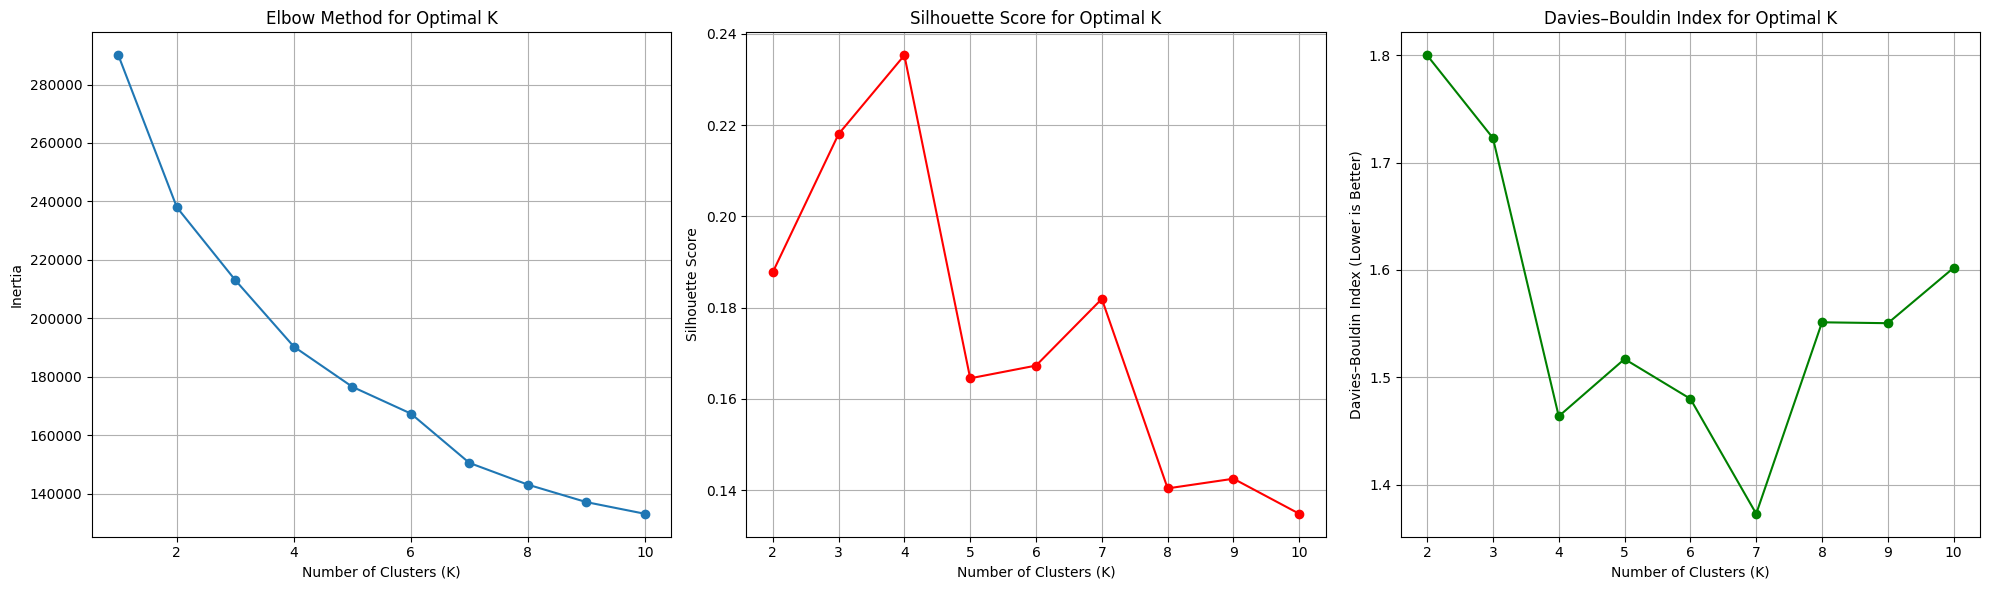

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Initialize empty lists
inertia = []
silhouette_scores = []
dbi_scores = [] # utk kira the compactness & separation between clusters
# so, Lower DBI = better clustering

# Define k ranges
k_range_elbow = range(1, 11)        # Elbow
k_range_validation = range(2, 11)   # Silhouette & DBI (k >= 2)

# Elbow Method
print("🔹 Elbow Method (Inertia values)")
for k in k_range_elbow:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    print(f"K = {k} → Inertia = {kmeans.inertia_:.2f}")

# Silhouette & Davies–Bouldin
print("\n🔹 Silhouette Score & Davies–Bouldin Index")
for k in k_range_validation:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_scaled)

    sil_score = silhouette_score(df_scaled, labels)
    dbi_score = davies_bouldin_score(df_scaled, labels)

    silhouette_scores.append(sil_score)
    dbi_scores.append(dbi_score)

    print(
        f"K = {k} → "
        f"Silhouette = {sil_score:.4f}, "
        f"Davies–Bouldin = {dbi_score:.4f}"
    )

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Elbow plot
axes[0].plot(k_range_elbow, inertia, marker='o')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Silhouette plot
axes[1].plot(k_range_validation, silhouette_scores, marker='o', color='red')
axes[1].set_title('Silhouette Score for Optimal K')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Davies–Bouldin plot
axes[2].plot(k_range_validation, dbi_scores, marker='o', color='green')
axes[2].set_title('Davies–Bouldin Index for Optimal K')
axes[2].set_xlabel('Number of Clusters (K)')
axes[2].set_ylabel('Davies–Bouldin Index (Lower is Better)')
axes[2].grid(True)

plt.tight_layout()
plt.show()


🔼 Although silhouette scores fluctuate for higher values of K, this behaviour is expected as increasing the number of clusters leads to over-fragmentation of the data. Both the Elbow Method and Silhouette analysis consistently indicate that K = 4 provides the best balance between cluster compactness, separation, and interpretability.

**Why NOT choose K = 7 (even with lower DBI)**

* DBI naturally decreases as K increases
→ more clusters = smaller, tighter groups

* This leads to over-fragmentation

**Clusters become:**

* hard to interpret

* less meaningful at country level

📌 Clustering is not only about numbers — it’s about useful structure.

## **Perform k-Means Clustering**

Perform k-Means clustering on the prepared (scaled) data using K=4 as the optimal number of clusters, based on the highest Silhouette Score. Assign the resulting cluster labels back to the original (unscaled) fused dataset.


In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans model with K=4
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init='auto')

# Fit the model to the scaled data
kmeans_optimal.fit(df_scaled)

# Assign cluster labels to a new column in the original df
df['Cluster'] = kmeans_optimal.labels_

print("Cluster labels assigned successfully to the original DataFrame.")
print(df[['Cluster']].head())

Cluster labels assigned successfully to the original DataFrame.
   Cluster
0        3
1        3
2        3
3        3
4        3


🔼 meaning that the first 5 rows of the datasets belong to Cluster 3

In [ ]:
cluster_summary = df.groupby('Cluster')[['Life expectancy', 'GDP', 'Schooling', 'suicides/100k pop']].mean()
print("Average characteristics for each cluster:")
print(cluster_summary)

Average characteristics for each cluster:
         Life expectancy           GDP  Schooling  suicides/100k pop
Cluster                                                             
0              65.467500   3887.853876  12.797500           3.141021
1              81.121197  28426.092668  16.137656          12.811394
2              74.110606   6715.340003  13.545455          12.081136
3              73.349935   4893.931092  13.178039          12.392789


🔼

Kita boleh nampak :

1) Cluster 0 = lowest life expectancy (LE), lowest GDP and lowest schooling  ▶ so kita boleh conclude yang cluster ni **lowest on development indicators**

2) Cluster 1 = Highest LE , Highest GDP, Highest Schoolong  ▶ kita boleh conclude ni drpd **highly developed country**

3) Cluster 2 = Second highest LE, Second highest GDP, second highest schooling  ▶ kita boleh conclude ni drpd **Medium developing country tp dh nk dekat developed**

3) Cluster 3 = Third highest LE, third highest GDP, third schooling  ▶ kita boleh conclude ni drpd **Medium developing country tp worst drpd cluster 2**

**Kan awal2 kita dh drop 'suicides/100k pop' utk elak cluster tu jadi bias, tp kita bawa balik as post-hoc utk kira balik the average suicide per cluster**

So nampak la highest developed country paling tinggi suicide, maybe sbb pressure , stress, economic tinggi sangat and so on


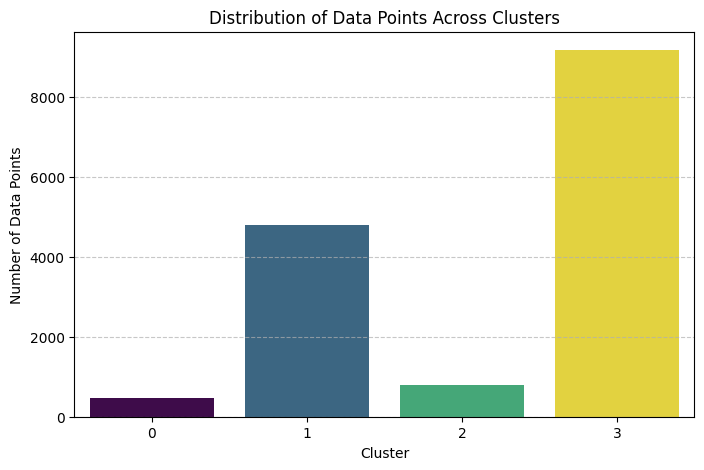

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plotting the cluster distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

🔼 This bar chart shows the number of data points (countries) assigned to each cluster after clustering.

* Dia tunjuk cluster size je bukan pasal suicide rate, gdp or etc
